# EV Market Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
import warnings # For removing warnings (optional)
warnings.filterwarnings("ignore")

## Cars Dataset

### Preprocessing

In [3]:
# Load the dataset
cars_data = pd.read_csv('datasets/ev_cars_india.csv')

In [4]:
# Basic Info and Summary Statistics
print(cars_data.info())
print(cars_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand Name             11 non-null     object 
 1   Battery Capacity(kWh)  11 non-null     float64
 2   Acceleration(sec)      11 non-null     float64
 3   TopSpeed(km/h)         11 non-null     int64  
 4   Range(km)              11 non-null     int64  
 5   Max Power(kW)          11 non-null     int64  
 6   Max Torque(Nm)         11 non-null     int64  
 7   Transmission           11 non-null     object 
 8   No. of Seats           11 non-null     int64  
 9   Charging T(h)          11 non-null     int64  
 10  No. of Airbags         11 non-null     object 
 11  Drive Type             11 non-null     object 
 12  Price(Lh)              11 non-null     int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.2+ KB
None
       Battery Capacity(kWh)  Acceleration(sec)  T

In [5]:
# Check for Missing Values
print(cars_data.isnull().sum())

Brand Name               0
Battery Capacity(kWh)    0
Acceleration(sec)        0
TopSpeed(km/h)           0
Range(km)                0
Max Power(kW)            0
Max Torque(Nm)           0
Transmission             0
No. of Seats             0
Charging T(h)            0
No. of Airbags           0
Drive Type               0
Price(Lh)                0
dtype: int64


### Visualizations

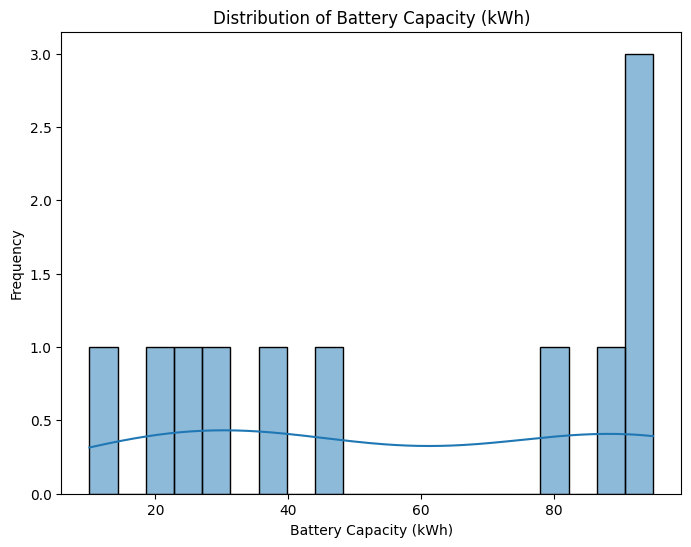

In [6]:
# Histogram of Battery Capacity
plt.figure(figsize=(8, 6))
sns.histplot(cars_data['Battery Capacity(kWh)'], bins=20, kde=True)
plt.title('Distribution of Battery Capacity (kWh)')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Frequency')
plt.show()

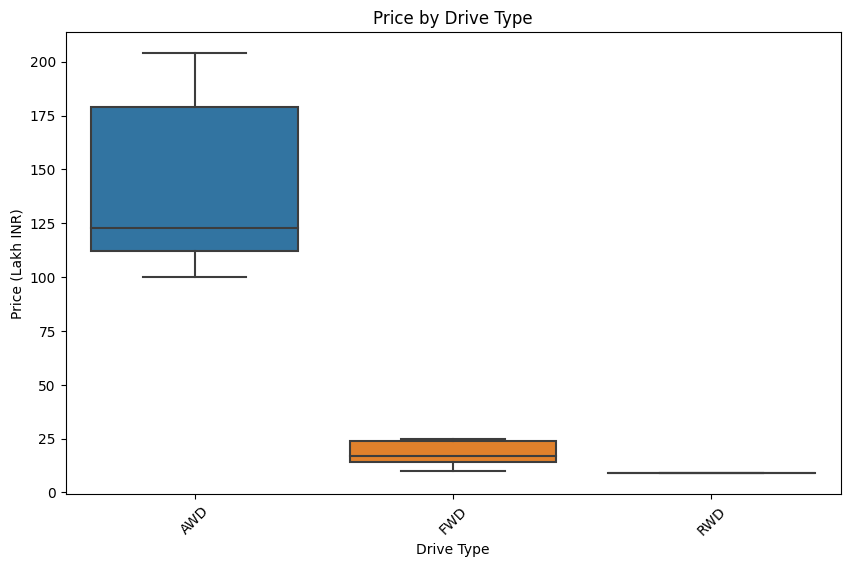

In [7]:
# Boxplot of Price by Drive Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drive Type', y='Price(Lh)', data=cars_data)
plt.title('Price by Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Price (Lakh INR)')
plt.xticks(rotation=45)
plt.show()

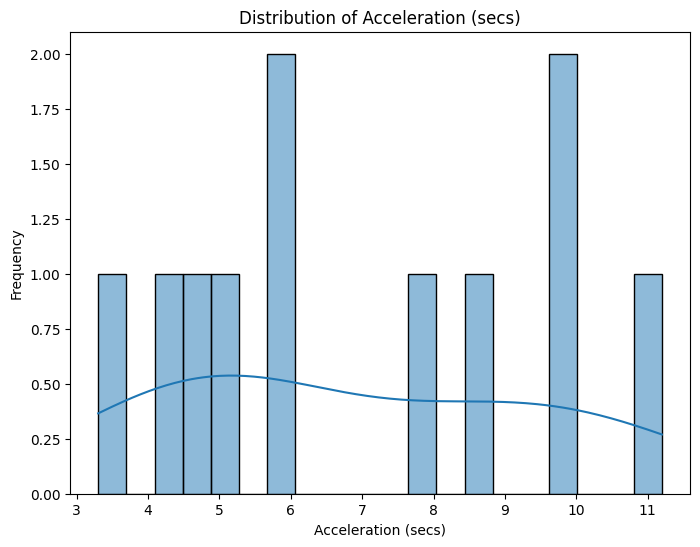

In [8]:
# Histogram of Acceleration
plt.figure(figsize=(8, 6))
sns.histplot(cars_data['Acceleration(sec)'], bins=20, kde=True)
plt.title('Distribution of Acceleration (secs)')
plt.xlabel('Acceleration (secs)')
plt.ylabel('Frequency')
plt.show()

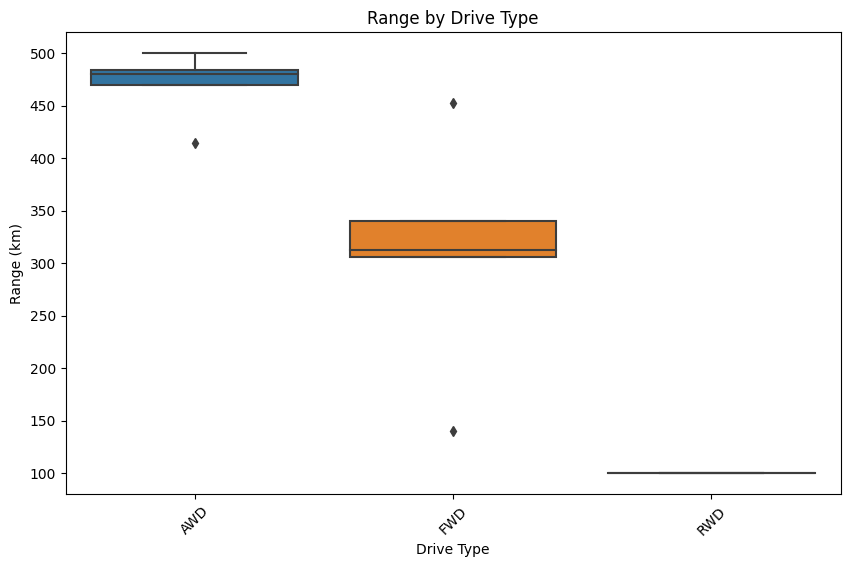

In [9]:
# Boxplot of Range by Drive Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Drive Type', y='Range(km)', data=cars_data)
plt.title('Range by Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Range (km)')
plt.xticks(rotation=45)
plt.show()

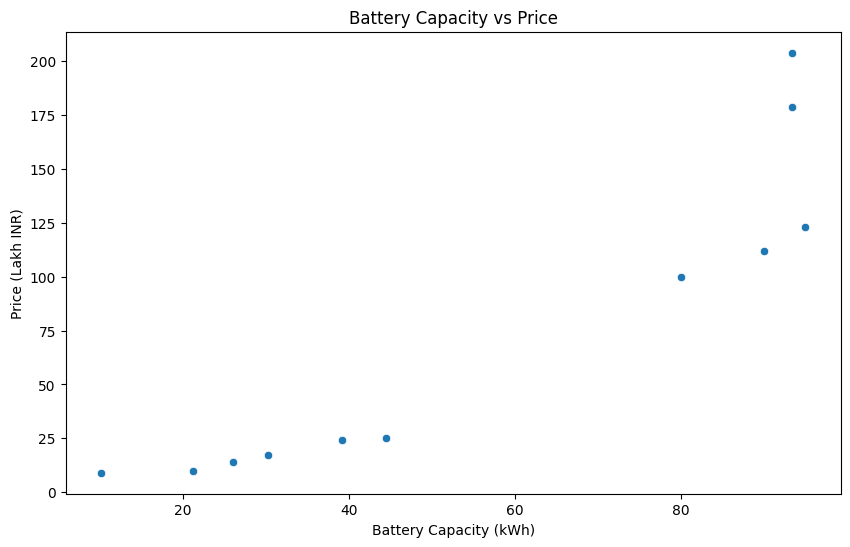

In [10]:
# Scatter plot for Battery Capacity vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Battery Capacity(kWh)', y='Price(Lh)', data=cars_data)
plt.title('Battery Capacity vs Price')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Price (Lakh INR)')
plt.show()

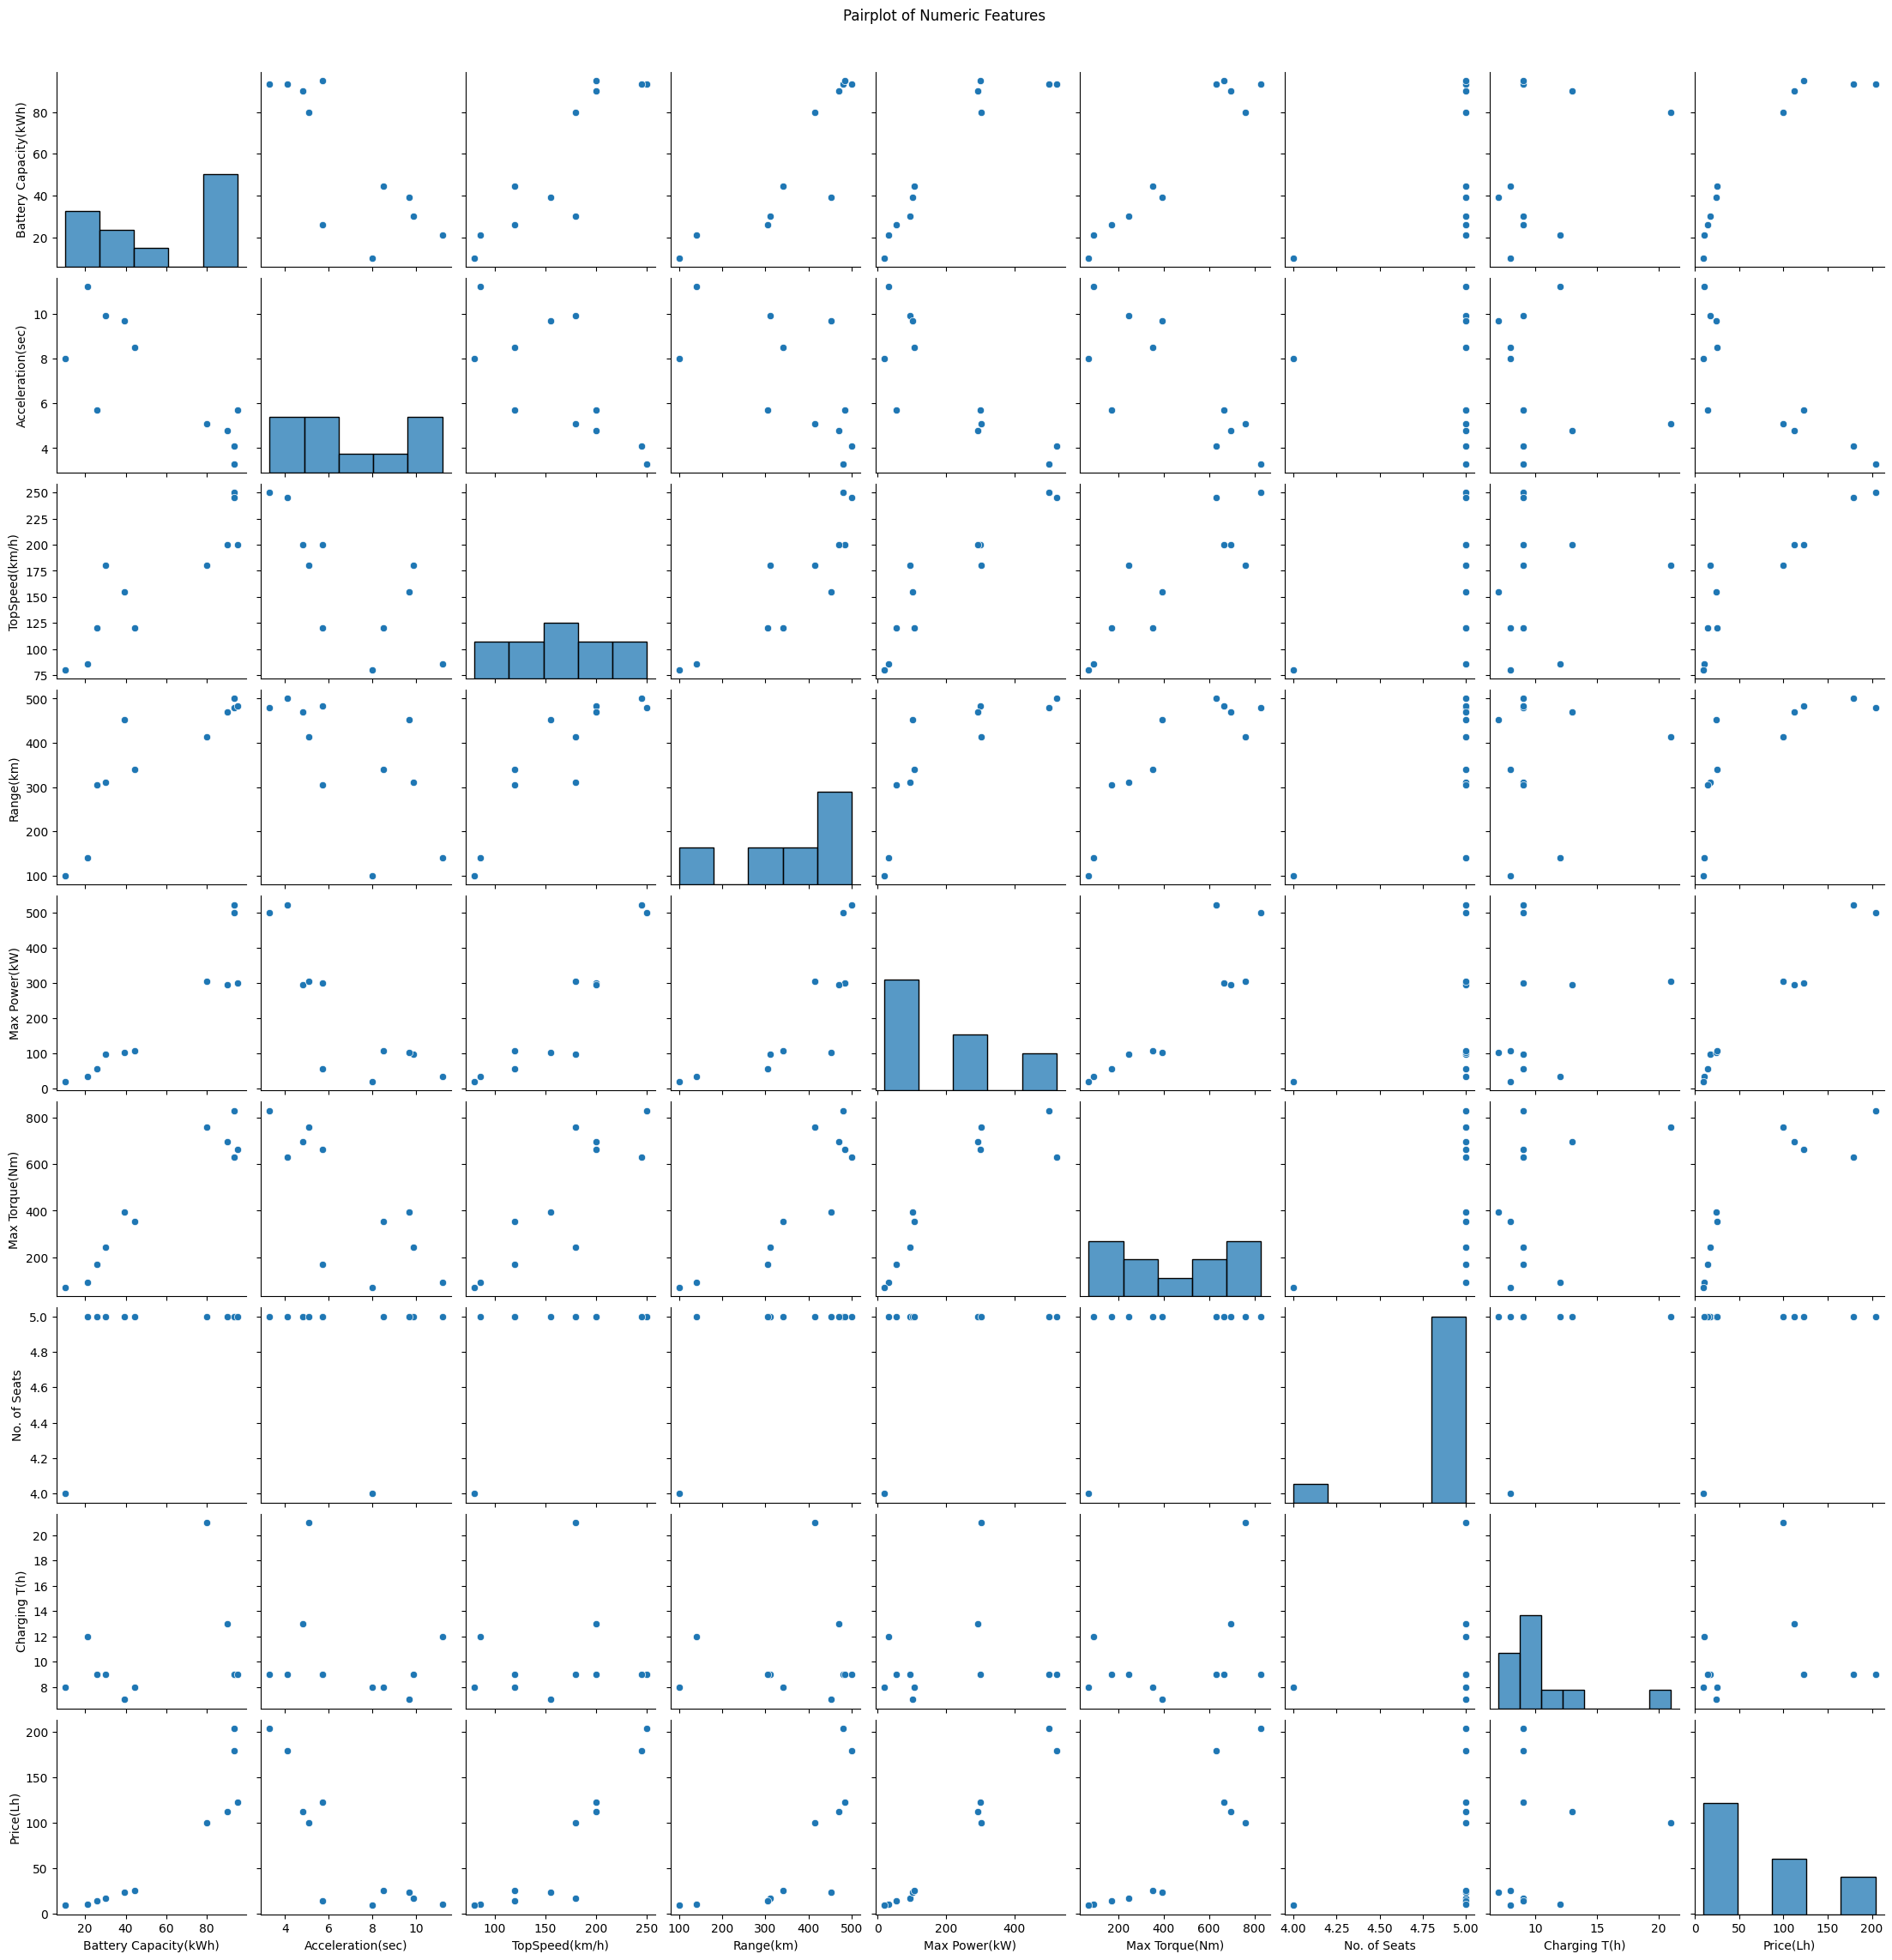

In [11]:
# Pairplot of Numeric Features
numeric_columns = ['Battery Capacity(kWh)', 'Acceleration(sec)', 'TopSpeed(km/h)', 'Range(km)', 'Max Power(kW)', 'Max Torque(Nm)', 'No. of Seats', 'Charging T(h)', 'Price(Lh)']
sns.pairplot(cars_data[numeric_columns])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

## Two Wheelers Dataset

### Preprocessing

In [12]:
# Load the dataset
two_wheelers_data = pd.read_csv('datasets/two_wheelers_india.csv')

In [13]:
# Basic Info and Summary Statistics
print(two_wheelers_data.info())
print(two_wheelers_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model             74 non-null     object 
 1   Price             74 non-null     float64
 2   Range             70 non-null     float64
 3   Charging_time     13 non-null     object 
 4   Top_speed         59 non-null     float64
 5   Motor_type        74 non-null     object 
 6   Battery_type      66 non-null     object 
 7   Battery_capacity  70 non-null     object 
 8   Wheels_type       70 non-null     object 
 9   Tyre_type         63 non-null     object 
dtypes: float64(3), object(7)
memory usage: 5.9+ KB
None
           Price       Range   Top_speed
count  74.000000   70.000000   59.000000
mean    1.032297  111.871429   66.440678
std     0.574791   49.950097   32.292452
min     0.250000   50.000000   18.000000
25%     0.642500   76.250000   41.000000
50%     0.965000  100.000000  

In [14]:
# Check for Missing Values
print(two_wheelers_data.isnull().sum())

Model                0
Price                0
Range                4
Charging_time       61
Top_speed           15
Motor_type           0
Battery_type         8
Battery_capacity     4
Wheels_type          4
Tyre_type           11
dtype: int64


### Visualizations

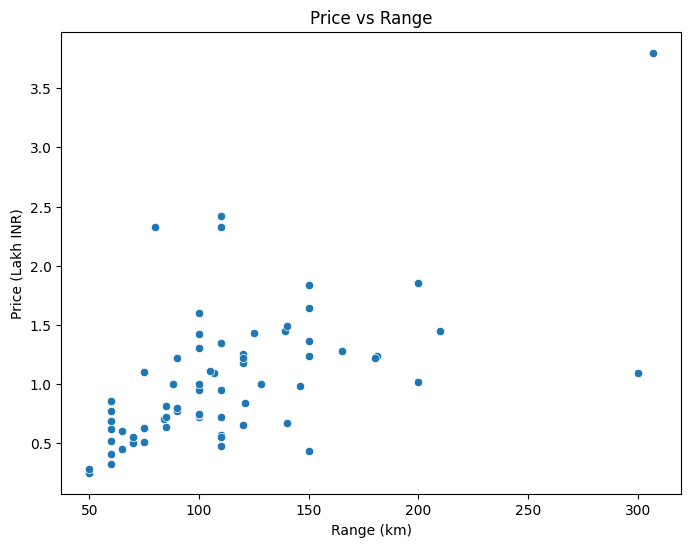

In [15]:
# Scatterplot of Price vs Range
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Range', y='Price', data=two_wheelers_data)
plt.title('Price vs Range')
plt.xlabel('Range (km)')
plt.ylabel('Price (Lakh INR)')
plt.show()

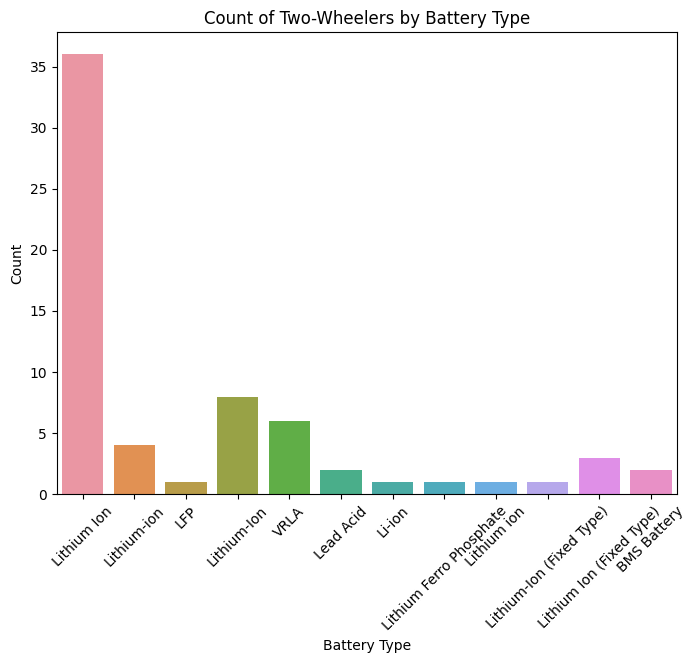

In [16]:
# Countplot of Battery Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Battery_type', data=two_wheelers_data)
plt.title('Count of Two-Wheelers by Battery Type')
plt.xlabel('Battery Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

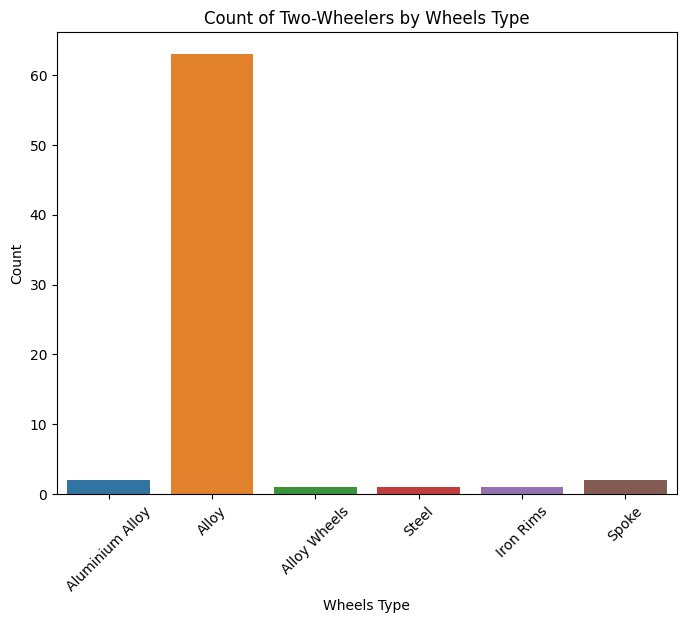

In [17]:
# Countplot Wheel Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Wheels_type', data=two_wheelers_data)
plt.title('Count of Two-Wheelers by Wheels Type')
plt.xlabel('Wheels Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

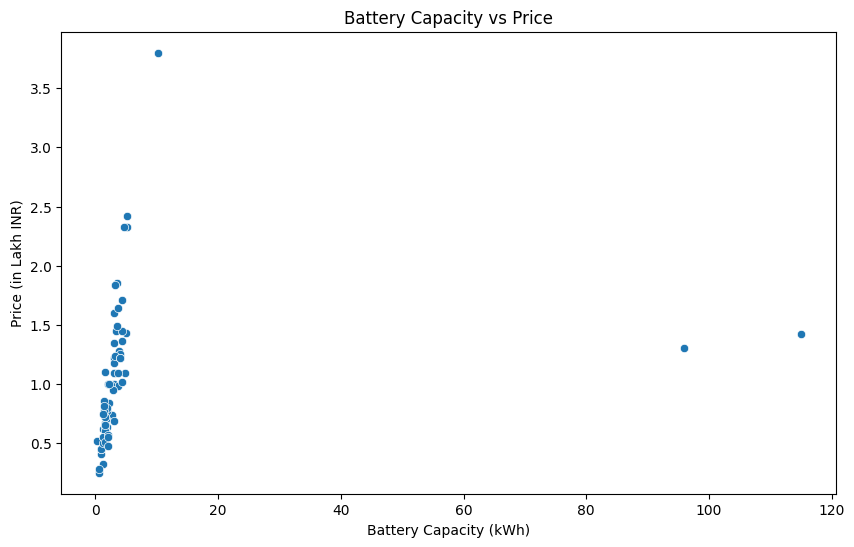

In [18]:
# Convert 'Battery Capacity' to a numeric format
two_wheelers_data['Battery_capacity'] = two_wheelers_data['Battery_capacity'].str.replace('kWh', '')
two_wheelers_data['Battery_capacity'] = two_wheelers_data['Battery_capacity'].str.replace('kwh', '')
two_wheelers_data['Battery_capacity'] = two_wheelers_data['Battery_capacity'].str.replace('KWh', '')
two_wheelers_data['Battery_capacity'] = two_wheelers_data['Battery_capacity'].str.replace('KWH', '')
two_wheelers_data['Battery_capacity'] = two_wheelers_data['Battery_capacity'].str.replace('Kwh', '')
two_wheelers_data['Battery_capacity'] = two_wheelers_data['Battery_capacity'].str.replace('kWH', '').astype(float)

# Scatter plot for Battery Capacity vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Battery_capacity', y='Price', data=two_wheelers_data)
plt.title('Battery Capacity vs Price')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Price (in Lakh INR)')
plt.show()

## Segmentation for Cars Dataset

In [19]:
# Data Preprocessing
# - Select relevant numeric features for segmentation
# - Handle missing data (if any)
# - Standardize the features (important for K-means)
selected_features_cars = ['Battery Capacity(kWh)', 'Acceleration(sec)', 'TopSpeed(km/h)', 'Range(km)', 'Max Power(kW)', 'Max Torque(Nm)', 'No. of Seats', 'Charging T(h)', 'Price(Lh)']
cars_data = cars_data[selected_features_cars].dropna()

In [20]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cars_data)

In [21]:
# Prepare the data with the selected features
X = cars_data[selected_features_cars]

In [22]:
# Initialize a list to store the explained variances
explained_variances = []

In [23]:
# Determine the optimal number of clusters (K)
for k in range(1, 11):  # Trying K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    explained_variances.append(kmeans.inertia_)  # Inertia measures how far the points within a cluster are

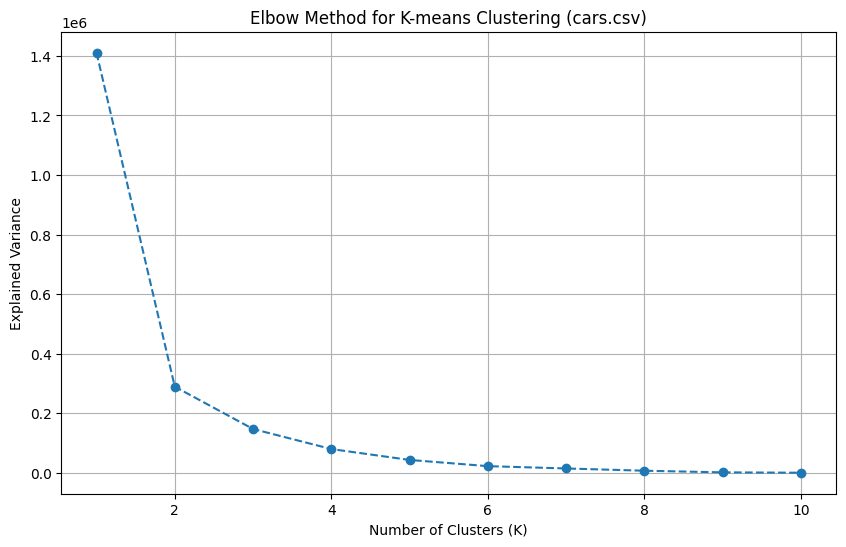

In [24]:
# Plot the explained variances
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), explained_variances, marker='o', linestyle='--')
plt.title('Elbow Method for K-means Clustering (cars.csv)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

In [25]:
# Optimal value of k is obtained as 4
k = 4

In [26]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [27]:
# Add cluster labels to the original dataset
cars_data['Cluster'] = clusters

In [28]:
# Principal Component Analysis (PCA) for visualization (optional)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
cars_data['PCA1'] = pca_result[:, 0]
cars_data['PCA2'] = pca_result[:, 1]

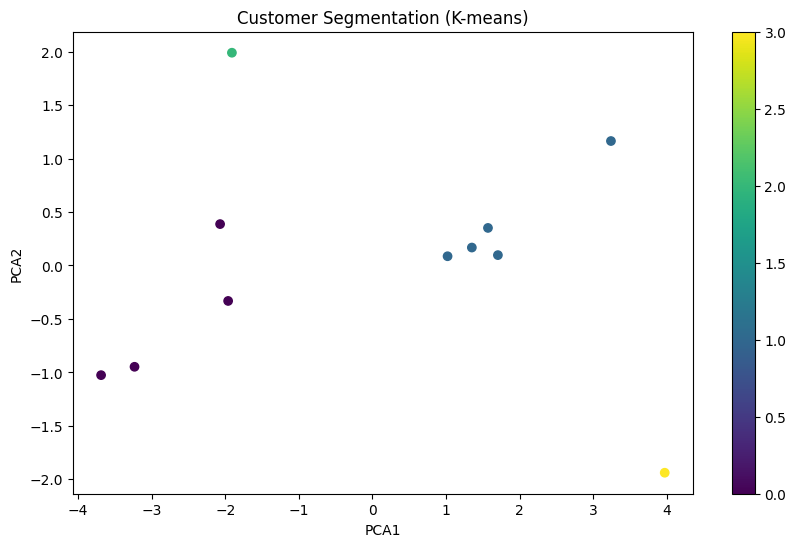

In [29]:
# Visualize the clusters (2D PCA plot)
plt.figure(figsize=(10, 6))
plt.scatter(cars_data['PCA1'], cars_data['PCA2'], c=cars_data['Cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Customer Segmentation (K-means)')
plt.colorbar()
plt.show()

In [30]:
# Analyze the characteristics of each cluster
cluster_means = cars_data.groupby('Cluster').mean()
print(cluster_means)

         Battery Capacity(kWh)  Acceleration(sec)  TopSpeed(km/h)  Range(km)  \
Cluster                                                                        
0                        92.95              4.475          223.75      483.5   
1                        32.22              9.000          132.20      310.0   
2                        80.00              5.100          180.00      414.0   
3                        10.08              8.000           80.00      100.0   

         Max Power(kW)  Max Torque(Nm)  No. of Seats  Charging T(h)  \
Cluster                                                               
0               404.25           705.0           5.0           10.0   
1                78.80           250.8           5.0            9.0   
2               304.00           760.0           5.0           21.0   
3                19.00            70.0           4.0            8.0   

         Price(Lh)      PCA1      PCA2  
Cluster                                 
0         

## Segmentation for Two-Wheeler Dataset

In [31]:
# Select relevant numeric features for segmentation
numeric_features = ['Price', 'Range', 'Top_speed']

In [32]:
two_wheelers_data = two_wheelers_data[numeric_features].dropna()

In [33]:
# Create a pipeline to preprocess numeric features and perform clustering
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numeric features
])

In [34]:
# Define a column transformer to apply transformations to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [35]:
# Prepare the data with only the numeric features
X = two_wheelers_data[numeric_features]

In [36]:
# Initialize a list to store the explained variances
explained_variances = []

In [37]:
# Determine the optimal number of clusters (K)
for k in range(1, 11):  # Trying K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    explained_variances.append(kmeans.inertia_)  # Inertia measures how far the points within a cluster are

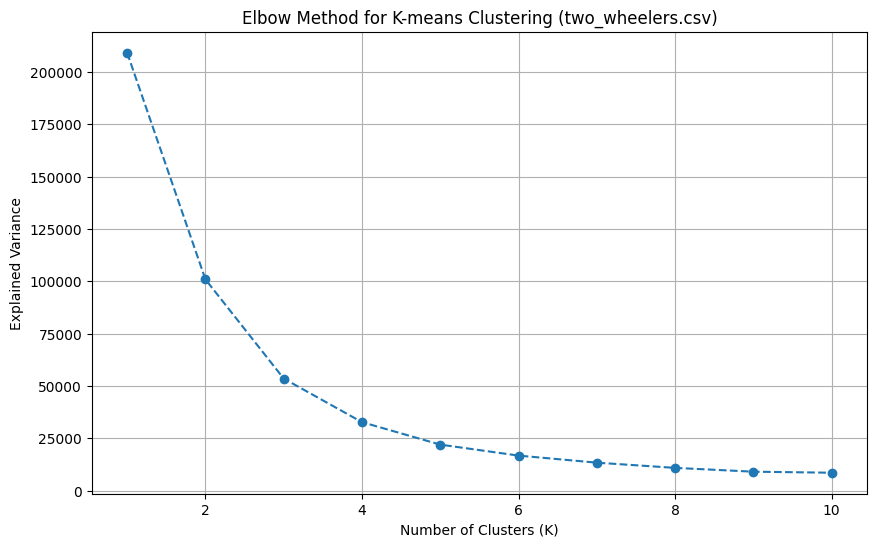

In [38]:
# Plot the explained variances
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), explained_variances, marker='o', linestyle='--')
plt.title('Elbow Method for K-means Clustering (two_wheelers.csv)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

In [39]:
# Optimal value of k is obtained as 4
k = 4

In [40]:
# Apply K-means clustering within the pipeline
kmeans = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', KMeans(n_clusters=k, random_state=42))])

In [41]:
# Fit the model and add cluster labels to the original dataset
two_wheelers_data['Cluster'] = kmeans.fit_predict(two_wheelers_data[numeric_features])

In [42]:
# Analyze the characteristics of each cluster
cluster_means = two_wheelers_data.groupby('Cluster').mean()
print(cluster_means)

            Price       Range   Top_speed
Cluster                                  
0        1.406250  120.000000   87.833333
1        0.650769   83.576923   35.153846
2        1.204000  214.200000  102.200000
3        3.800000  307.000000  152.000000
